In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Data.csv')

In [9]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

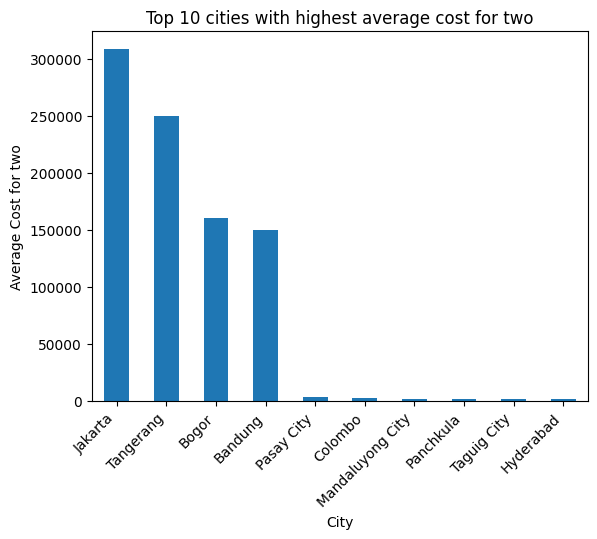

In [32]:
# Group by city and calculate average cost
df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10).plot(kind='bar') 
plt.title('Top 10 cities with highest average cost for two')
plt.xticks(rotation=45, ha='right')# Rotate x labels
plt.xlabel('City')
plt.ylabel('Average Cost for two') 
plt.show() 

In [41]:
#Cuisines total number of votes
data = df.groupby('Cuisines')['Votes'].sum().reset_index()


In [43]:
data[data['Votes'] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


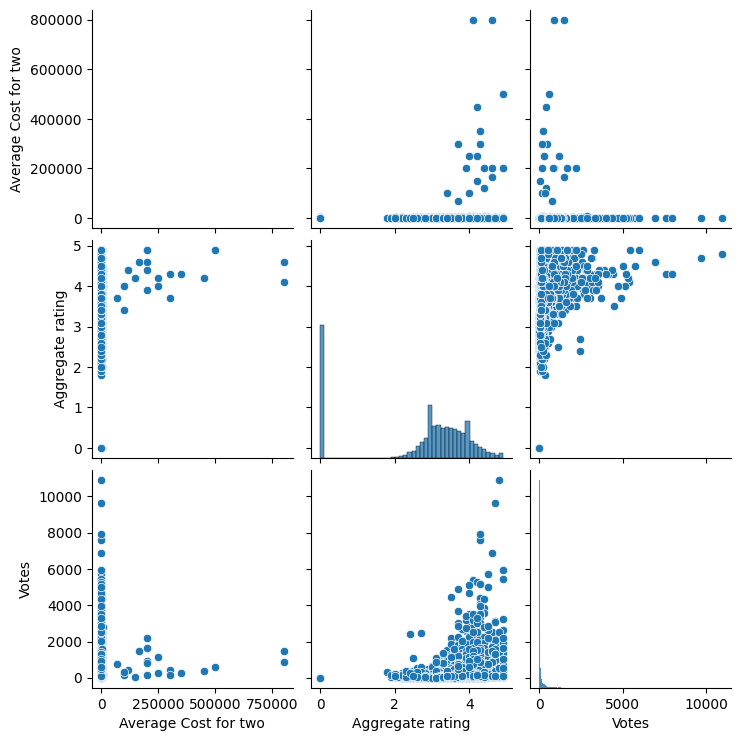

In [46]:
sns.pairplot(df[['Average Cost for two', 'Aggregate rating', 'Votes']])

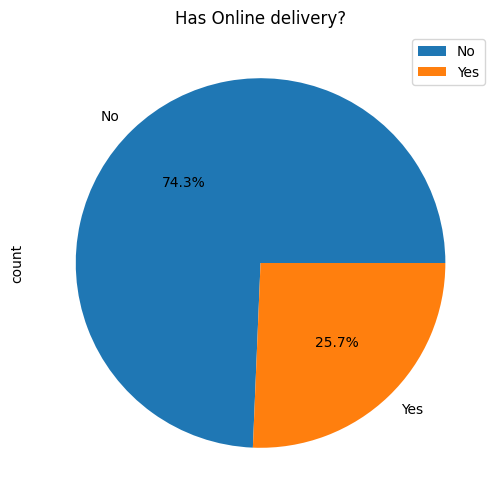

In [ ]:
df['Has Online delivery'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',title='Has Online delivery?', 
    figsize=(6, 6),legend=True
)
plt.show()

In [69]:
df[['Aggregate rating', 'Rating text']].sort_values(by='Aggregate rating', ascending=True).head(2200)

,Aggregate rating,Rating text
2204,0.0,Not rated
78,0.0,Not rated
77,0.0,Not rated
69,0.0,Not rated
6953,0.0,Not rated
...,...,...
2019,2.2,Poor
2018,2.2,Poor
1296,2.2,Poor
2589,2.2,Poor


In [71]:
df = df[df["Rating text"] != "Not rated"]    

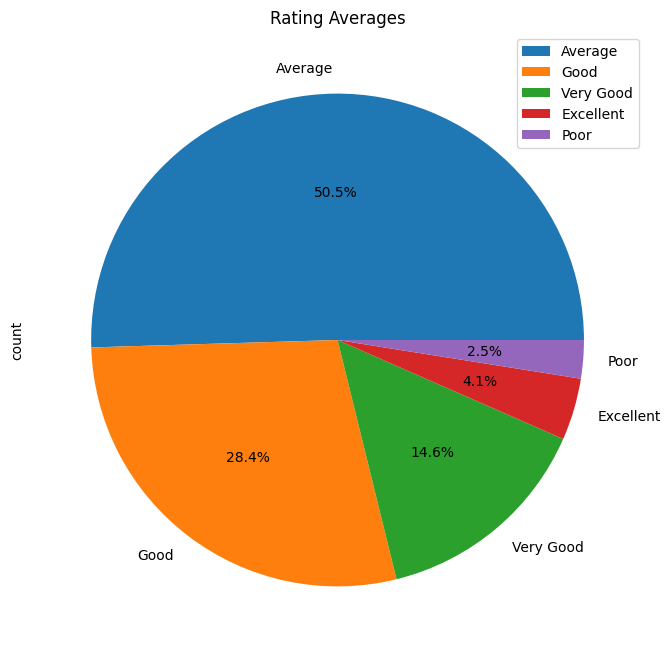

In [84]:
df['Rating text'].value_counts().plot(
    kind='pie',
    title='Rating Averages',
    autopct='%1.1f%%',
    figsize=(8,8),
    legend=True
)
plt.show()

In [85]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [86]:
X = df[['Average Cost for two', 'Has Table booking', 'Has Online delivery','Price range' ]]

In [87]:
Y = df[['Aggregate rating']]

In [90]:
X['Price range'].value_counts()

Price range
1    2744
2    2711
3    1373
4     575
Name: count, dtype: int64

In [91]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [93]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [94]:
X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])

C:\Users\ulas_\AppData\Local\Temp\ipykernel_24304\3860357707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])


In [101]:
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])

C:\Users\ulas_\AppData\Local\Temp\ipykernel_24304\3223307020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [103]:
X = scaler.fit_transform(X)

In [104]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]],
      shape=(7403, 4))

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,)

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [108]:
def modelresults(predictions):
    print('Mean Absolute Error:', mean_absolute_error(Y_test, predictions))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, predictions)))

In [110]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [111]:
lr.fit(X_train, Y_train)

LinearRegression()

In [113]:
predictionsfromlr = lr.predict(X_test)

In [114]:
modelresults(predictionsfromlr)

Mean Absolute Error: 0.39066869663953224
Root Mean Squared Error: 0.4926848681885036


In [115]:
predictionsfromlr

array([[4.0110888 ],
       [3.42228271],
       [3.42240972],
       ...,
       [3.22700534],
       [3.25934604],
       [4.01091734]], shape=(1481, 1))

In [117]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [118]:
svrmodel = SVR()   

In [121]:
param_gridsvr = {'C': [0.1, 0.5], 'kernel': ['linear', 'poly'], 'degree': [2]}

In [122]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(X_train, Y_train) 

c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [124]:
predictionsgridsvr = gridsvr.predict(X_test)

In [125]:
modelresults(predictionsgridsvr)

Mean Absolute Error: 0.38774136513957064
Root Mean Squared Error: 0.49308893046620395


In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
param_grid = {
    'max_depth': [10,30],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

In [128]:
treemodel = DecisionTreeRegressor()

In [129]:
grid_tree = GridSearchCV(estimator=treemodel, param_grid=param_grid)

In [130]:
grid_tree.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [132]:
treepredictions = grid_tree.predict(X_test)

In [133]:
modelresults(treepredictions)

Mean Absolute Error: 0.3554486274378243
Root Mean Squared Error: 0.45069138649975893


In [134]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
rfrmodedl = RandomForestRegressor()

In [142]:
param_gridrfr = {
    'max_depth': [5,15],
    'n_estimators': [2,5,10]
}

In [143]:
gridrfr = GridSearchCV(rfrmodedl, param_gridrfr)

In [144]:
gridrfr.fit(X_train, Y_train)   

c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [145]:
randomforestpredictions = gridrfr.predict(X_test)

In [146]:
modelresults(randomforestpredictions)

Mean Absolute Error: 0.35482403035935123
Root Mean Squared Error: 0.4488564380182112


In [147]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [148]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [155]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {'n_neighbors': [11,13,15,17]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [156]:
knn_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [11, 13, 15, 17]})

In [157]:
knnpredictions = knn_grid_search.predict(X_test)

In [158]:
modelresults(knnpredictions)

Mean Absolute Error: 0.3612559081701553
Root Mean Squared Error: 0.4603986959818197


In [159]:
knn_grid_search.best_params_

{'n_neighbors': 15}

In [160]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.5, 1]}
ada_grid_search = GridSearchCV(ada, ada_param_grid)

In [161]:
ada_grid_search.fit(X_train, Y_train)

c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ulas_\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [162]:
adapredictions = ada_grid_search.predict(X_test)

In [163]:
modelresults(adapredictions)

Mean Absolute Error: 0.36393535556875795
Root Mean Squared Error: 0.4602751210404411


In [164]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [165]:
import joblib
joblib.dump(gridrfr, 'mlmodel.pkl')

['mlmodel.pkl']

In [166]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']